# CSC 363 - Farmingdale State College

## SQL DDL Module Assignment

In this module, you'll see how a database schema can be described using SQL. You'll also see how data in tables can be inserted and updated. Topics covered include:

- SQL Data Definition Language (SQL DDL)
- ALTER TABLE
- Basic SQL Data Modification Language (DML) - UPDATE, INSERT, and DELETE statements

The specific dialect of SQL that we'll work with is T-SQL, which has been developed by Microsoft for use with SQL Server.

**HOW TO COMPLETE THIS ASSIGNMENT**
1. Open this notebook in Azure Data Studio. 
1. Complete all tasks.
    - When you first try to run a code cell, you will be prompted to connect to SQL Server.
        - You will need to be on a campus machine or connected to one via VMWare Horizon in order to connect to the department SQL Server.
    - Set authentication type to "SQL Login"
    - The server name is csserver2.it.farmingdale.edu
    - The user name is the part of your Farmingdale email address before the @farmingdale.edu.
    - Your password is your birthdate (mmddyy) followed by the last four digits of your RAM ID. If your birthday and RAM ID were May 1, 2002 and R123456789, then your password would be 0501026789.
    - Set "Database" to your user name (the part of your Farmingdale email address before the @farmingdale.edu).
1. **Run** the code cells.
    - The code cells must successfully run and not throw an error!
    - In order to give you credit for the assignment, I **must** see that you actually ran your code!
1. Save the notebook.
1. Submit two files in Brightspace:
   - The .ipynb notebook file.
   - A single PDF containing screenshots showing that you completed each task, i.e., showing the output of all code cells.




### Task #0a
A database has been created for you on the department SQL Server. I also have a database on the department SQL Server. Throughout the semester, you will use both your database and my database to complete assignments.

The IT department uses your Farmingdale user name (the part of your email address before the @farmingdale) as both your username to log into the department SQL Server *and* the name of your database. Confusing, I know.

**Task: Since this is the first time you're accessing your database, there is a small amout of upkeep to be done. Basically, I need you to run a few short commands. These commands will allow me to view your database.** In the cell below:
* Replace <your_sql_server_username> with your username (the part of your email address before the @farmingdale.edu)
* Run the cell (use the "play" button on the left of the cell)

In [8]:
USE yaghs;
GO

CREATE USER yaghs;
ALTER ROLE db_datareader ADD MEMBER yaghs;

Commands completed successfully.

: Msg 15023, Level 16, State 1, Line 4
User, group, or role 'yaghs' already exists in the current database.

Total execution time: 00:00:00.003

### Task #0b

Databases in SQL Server are organized into **schemas**. Schemas are separate namespaces and are used to organize tables and other database objects. You cannot have two tables with the same name in the same schema, but you can have two tables with the same name in different schemas.

For module assignments which involve creating tables, you will generally want to create a separate schema. You can then create all the tables (and other database objects) in that schema. This will avoid conflicts with work that you've done in other modules.

**TASK: Create a schema to use in this module. Call it "module04".** 

To create a schema, use the CREATE SCHEMA command. The general syntax is as follows:

CREATE SCHEMA schema_name

A few notes:
* Every database contains a default schema called "dbo". If you do not specify a schema when running a command, it will run on the dbo schema.
* In SQL Server, the opposite of CREATE is DROP. Most commands that begin with CREATE have an equivalent DROP command. To remove a SCHEMA, you would run DROP SCHEMA schema_name. Note that you cannot drop a schema unless you first drop any tables contained in the schema.

In [24]:
CREATE SCHEMA module04
GO

: Msg 2714, Level 16, State 6, Line 1
There is already an object named 'module04' in the database.

: Msg 2759, Level 16, State 0, Line 1
CREATE SCHEMA failed due to previous errors.

Total execution time: 00:00:00.002

In [25]:
-- Please run the following command along with your SQL.
SET NOCOUNT ON
SELECT ORIGINAL_LOGIN() AS 'USER'
SET NOCOUNT OFF
GO

-- Enter your SQL code here.

Commands completed successfully.

Commands completed successfully.

Total execution time: 00:00:00.010

USER yaghs

### Task #1

The following COMPANY schema comes from your textbook:

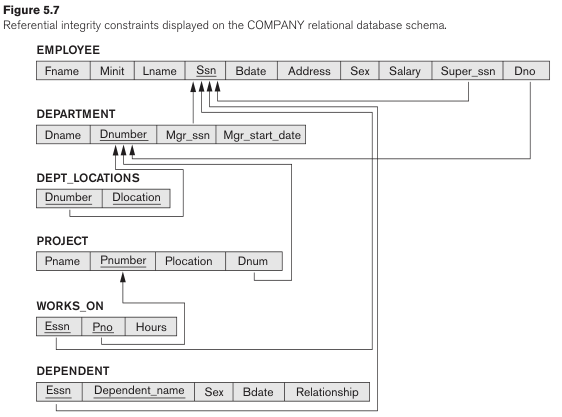

**Task: Write and execute SQL DDL which implements this schema.**
* Include primary key constraints.
* Include foreign key constraints.
* All constraints should have names.
* Choose reasonable data types. 
* Create the tables in your module04 schema.

**Note:** There is a circular reference between EMPLOYEE and DEPARTMENT. DEPARTMENT.mgr_ssn references EMPLOYEE.ssn. To create this foreign key reference, the EMPLOYEE table must therefore exist first. But EMPLOYEE.dno referes to DEPARTMENT.dno, and to make *this* foreign key, the DEPARTMENT table must first exist. This creates a chicken-or-the-egg problem, where each requires the other to exist first. 

One solution is to use ALTER TABLE statements to add the constraints. First, create the tables, but without the foreign keys. Then, once both tables have been created, you can use ALTER TABLE statements to add the foreign key constraints. https://www.sqltutorial.net/add-constraint-table-in-sql.html

In [47]:
-- Please run the following command along with your SQL.
SET NOCOUNT ON
SELECT ORIGINAL_LOGIN() AS 'USER'
SET NOCOUNT OFF
GO

CREATE TABLE module04.EMPLOYEE(
    Ssn char(9) PRIMARY KEY,
    Fname NVARCHAR(50),
    Minit CHAR(1),
    Lname NVARCHAR(50),
    Bdate DATE,
    Address NVARCHAR(255),
    Sex CHAR(1),
    Salary DECIMAL(10, 2),
    Super_ssn CHAR(9),
    Dno INT
)


IF OBJECT_ID('module.04.DEPARTMENT', 'U') IS NULL
CREATE TABLE module04.DEPARTMENT(
    Dnumber INT PRIMARY KEY,
    Dname NVARCHAR(50) UNIQUE, 
    Mgr_ssn CHAR(9),
    Mgr_start_date DATE
)

CREATE TABLE module04.DEPT_LOCATIONS(
    Dnumber INT,
    Dlocation NVARCHAR(100),
    PRIMARY KEY(Dnumber, Dlocation)
)

CREATE TABLE module04.PROJECT(
    Pnumber INT PRIMARY KEY,
    Pname NVARCHAR(100),
    Plocation NVARCHAR(100),
    Dnum INT
)

CREATE TABLE module04.WORKS_ON (
    Essn CHAR(9),
    Pno INT,
    Hours DECIMAL(4,2),
    PRIMARY KEY (Essn, Pno)
)

CREATE TABLE module04.DEPENDENT(
    Essn CHAR(9),
    Dependent_name NVARCHAR(50),
    Sex Char(1),
    Bdate DATE,
    Relationship NVARCHAR(50),
    PRIMARY KEY (Essn, Dependent_name)
)

ALTER TABLE module04.EMPLOYEE
ADD CONSTRAINT FK_EMPLOYEE_DEPARTMENT
FOREIGN KEY (Dno)
REFERENCES module04.DEPARTMENT (Dnumber)

ALTER TABLE module04.DEPARTMENT
ADD CONSTRAINT FK_DEPARTMENT_EMPLOYEE
FOREIGN KEY (Mgr_ssn)
REFERENCES module04.EMPLOYEE(Ssn)

ALTER TABLE module04.DEPT_LOCATIONS
ADD CONSTRAINT FK_DEPT_LOCATIONS_DEPARTMENT
FOREIGN KEY (Dnumber)
REFERENCES module04.DEPARTMENT (Dnumber);

ALTER TABLE module04.PROJECT
ADD CONSTRAINT FK_PROJECT_DEPARTMENT
FOREIGN KEY (Dnum)
REFERENCES module04.DEPARTMENT (Dnumber)

ALTER TABLE module04.WORKS_ON
ADD CONSTRAINT FK_WORKS_ON_EMPLOYEE
FOREIGN KEY (Essn)
REFERENCES module04.EMPLOYEE (Ssn)

ALTER TABLE module04.WORKS_ON
ADD CONSTRAINT FK_WORKS_ON_PROJECT
FOREIGN KEY (Pno)
REFERENCES module04.PROJECT (Pnumber)

ALTER TABLE module04.DEPENDENT
ADD CONSTRAINT FK_DEPARTMENT_EMPLOYEE
FOREIGN KEY (Essn)
REFERENCES module04.EMPLOYEE (Ssn)


Commands completed successfully.

Total execution time: 00:00:00.009

USER yaghs

: Msg 3726, Level 16, State 1, Line 8
Could not drop object 'module04.EMPLOYEE' because it is referenced by a FOREIGN KEY constraint.

: Msg 3726, Level 16, State 1, Line 12
Could not drop object 'module04.DEPARTMENT' because it is referenced by a FOREIGN KEY constraint.

: Msg 2714, Level 16, State 6, Line 30
There is already an object named 'EMPLOYEE' in the database.

In [49]:


CREATE TABLE module04.EMPLOYEE(
    Ssn char(9) PRIMARY KEY,
    Fname NVARCHAR(50),
    Minit CHAR(1),
    Lname NVARCHAR(50),
    Bdate DATE,
    Address NVARCHAR(255),
    Sex CHAR(1),
    Salary DECIMAL(10, 2),
    Super_ssn CHAR(9),
    Dno INT
)


IF OBJECT_ID('module.04.DEPARTMENT', 'U') IS NULL
CREATE TABLE module04.DEPARTMENT(
    Dnumber INT PRIMARY KEY,
    Dname NVARCHAR(50) UNIQUE, 
    Mgr_ssn CHAR(9),
    Mgr_start_date DATE
)

CREATE TABLE module04.DEPT_LOCATIONS(
    Dnumber INT,
    Dlocation NVARCHAR(100),
    PRIMARY KEY(Dnumber, Dlocation)
)

CREATE TABLE module04.PROJECT(
    Pnumber INT PRIMARY KEY,
    Pname NVARCHAR(100),
    Plocation NVARCHAR(100),
    Dnum INT
)

CREATE TABLE module04.WORKS_ON (
    Essn CHAR(9),
    Pno INT,
    Hours DECIMAL(4,2),
    PRIMARY KEY (Essn, Pno)
)

CREATE TABLE module04.DEPENDENT(
    Essn CHAR(9),
    Dependent_name NVARCHAR(50),
    Sex Char(1),
    Bdate DATE,
    Relationship NVARCHAR(50),
    PRIMARY KEY (Essn, Dependent_name)
)

ALTER TABLE module04.EMPLOYEE
ADD CONSTRAINT FK_EMPLOYEE_DEPARTMENT
FOREIGN KEY (Dno)
REFERENCES module04.DEPARTMENT (Dnumber)

ALTER TABLE module04.DEPARTMENT
ADD CONSTRAINT FK_DEPARTMENT_EMPLOYEE
FOREIGN KEY (Mgr_ssn)
REFERENCES module04.EMPLOYEE(Ssn)

ALTER TABLE module04.DEPT_LOCATIONS
ADD CONSTRAINT FK_DEPT_LOCATIONS_DEPARTMENT
FOREIGN KEY (Dnumber)
REFERENCES module04.DEPARTMENT (Dnumber);

ALTER TABLE module04.PROJECT
ADD CONSTRAINT FK_PROJECT_DEPARTMENT
FOREIGN KEY (Dnum)
REFERENCES module04.DEPARTMENT (Dnumber)

ALTER TABLE module04.WORKS_ON
ADD CONSTRAINT FK_WORKS_ON_EMPLOYEE
FOREIGN KEY (Essn)
REFERENCES module04.EMPLOYEE (Ssn)

ALTER TABLE module04.WORKS_ON
ADD CONSTRAINT FK_WORKS_ON_PROJECT
FOREIGN KEY (Pno)
REFERENCES module04.PROJECT (Pnumber)

ALTER TABLE module04.DEPENDENT
ADD CONSTRAINT FK_DEPARTMENT_EMPLOYEE
FOREIGN KEY (Essn)
REFERENCES module04.EMPLOYEE (Ssn)

: Msg 2714, Level 16, State 6, Line 3
There is already an object named 'EMPLOYEE' in the database.

Total execution time: 00:00:00.003

### Task #2

The following LIBRARY schema comes from your textbook:

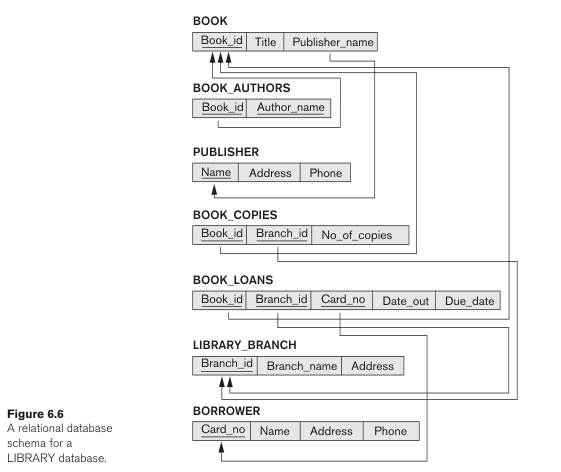

**Task: Write and execute SQL DDL which implements this schema.**
* Include primary key constraints.
* Include foreign key constraints.
* All constraints should have names.
* Choose reasonable data types.
* Create the tables in your module04 schema.

In [54]:
-- Please run the following command along with your SQL.
SET NOCOUNT ON
SELECT ORIGINAL_LOGIN() AS 'USER'
SET NOCOUNT OFF
GO

CREATE TABLE module04.BOOK(
    Book_id INT PRIMARY KEY,
    Title NVARCHAR(255),
    Publisher_name NVARCHAR(255)
);
CREATE TABLE module04.BOOK_AUTHORS(
    Book_id INT,
    Author_name NVARCHAR(255),
    PRIMARY KEY (Book_id, Author_name)
);
CREATE TABLE module04.PUBLISHER(
    name NVARCHAR(255) PRIMARY KEY,
    Address NVARCHAR(255),
    Phone NVARCHAR(25)
);
CREATE TABLE module04.BOOK_COPIES(
    Book_id INT,
    Branch_id INT,
    no_of_copies INT,
    PRIMARY KEY (Book_id, Branch_id)
);
CREATE TABLE module04.BOOK_LOANS (
    Book_id INT, 
    Branch_id INT,
    Card_no INT,
    Date_out INT,
    Due_date DATE,
    PRIMARY KEY (Book_id, Branch_id, Card_no)
);

CREATE TABLE module04.LIBRARY_BRANCH(
    Branch_id INT PRIMARY KEY,
    Branch_name NVARCHAR(255),
    Address NVARCHAR(255)
);
CREATE TABLE module04.BORROWER (
    Card_no INT PRIMARY KEY,
    Name NVARCHAR(255),
    Address NVARCHAR(255),
    Phone NVARCHAR(15)
);

ALTER TABLE module04.BOOK
ADD CONSTRAINT FK_BOOK_PUBLISHER
FOREIGN KEY (Publisher_name)
REFERENCES module04.PUBLISHER(name);

ALTER TABLE module04.BOOK_AUTHORS
ADD CONSTRAINT FK_BOOK_AUTHORS_BOOK
FOREIGN KEY (Book_id)
REFERENCES module04.BOOK (Book_id);

ALTER TABLE module04.BOOK_COPIES
ADD CONSTRAINT FK_BOOK_COPIES_BOOK
FOREIGN KEY (Book_id)
REFERENCES module04.BOOK (Book_id);

ALTER TABLE module04.BOOK_COPIES
ADD CONSTRAINT FK_BOOK_COPIES_BRANCH
FOREIGN KEY (Branch_id)
REFERENCES module04.LIBRARY_BRANCH (Branch_id);

ALTER TABLE module04.BOOK_LOANS
ADD CONSTRAINT FK_BOOK_LOANS_BOOK
FOREIGN KEY (Book_id)
REFERENCES module04.BOOK(Book_id);

ALTER TABLE module04.BOOK_LOANS
ADD CONSTRAINT FK_BOOK_LOANS_BRANCH
FOREIGN KEY (Branch_id)
REFERENCES module04.LIBRARY_BRANCH (Branch_id);

ALTER TABLE module04.BOOK_LOANS
ADD CONSTRAINT FK_BOOK_LOANS_BORROWER
FOREIGN KEY (Card_no)
REFERENCES module04.BORROWER (Card_no)

-- Enter your SQL code here.


Commands completed successfully.

Total execution time: 00:00:00.009

USER yaghs

: Msg 2714, Level 16, State 6, Line 7
There is already an object named 'BOOK' in the database.

In [53]:
CREATE TABLE module04.BOOK(
    Book_id INT PRIMARY KEY,
    Title NVARCHAR(255),
    Publisher_name NVARCHAR(255)
);
CREATE TABLE module04.BOOK_AUTHORS(
    Book_id INT,
    Author_name NVARCHAR(255),
    PRIMARY KEY (Book_id, Author_name)
);
CREATE TABLE module04.PUBLISHER(
    name NVARCHAR(255) PRIMARY KEY,
    Address NVARCHAR(255),
    Phone NVARCHAR(25)
);
CREATE TABLE module04.BOOK_COPIES(
    Book_id INT,
    Branch_id INT,
    no_of_copies INT,
    PRIMARY KEY (Book_id, Branch_id)
);
CREATE TABLE module04.BOOK_LOANS (
    Book_id INT, 
    Branch_id INT,
    Card_no INT,
    Date_out INT,
    Due_date DATE,
    PRIMARY KEY (Book_id, Branch_id, Card_no)
);

CREATE TABLE module04.LIBRARY_BRANCH(
    Branch_id INT PRIMARY KEY,
    Branch_name NVARCHAR(255),
    Address NVARCHAR(255)
);
CREATE TABLE module04.BORROWER (
    Card_no INT PRIMARY KEY,
    Name NVARCHAR(255),
    Address NVARCHAR(255),
    Phone NVARCHAR(15)
);

ALTER TABLE module04.BOOK
ADD CONSTRAINT FK_BOOK_PUBLISHER
FOREIGN KEY (Publisher_name)
REFERENCES module04.PUBLISHER(name);

ALTER TABLE module04.BOOK_AUTHORS
ADD CONSTRAINT FK_BOOK_AUTHORS_BOOK
FOREIGN KEY (Book_id)
REFERENCES module04.BOOK (Book_id);

ALTER TABLE module04.BOOK_COPIES
ADD CONSTRAINT FK_BOOK_COPIES_BOOK
FOREIGN KEY (Book_id)
REFERENCES module04.BOOK (Book_id);

ALTER TABLE module04.BOOK_COPIES
ADD CONSTRAINT FK_BOOK_COPIES_BRANCH
FOREIGN KEY (Branch_id)
REFERENCES module04.LIBRARY_BRANCH (Branch_id);

ALTER TABLE module04.BOOK_LOANS
ADD CONSTRAINT FK_BOOK_LOANS_BOOK
FOREIGN KEY (Book_id)
REFERENCES module04.BOOK(Book_id);

ALTER TABLE module04.BOOK_LOANS
ADD CONSTRAINT FK_BOOK_LOANS_BRANCH
FOREIGN KEY (Branch_id)
REFERENCES module04.LIBRARY_BRANCH (Branch_id);

ALTER TABLE module04.BOOK_LOANS
ADD CONSTRAINT FK_BOOK_LOANS_BORROWER
FOREIGN KEY (Card_no)
REFERENCES module04.BORROWER (Card_no)

: Msg 2714, Level 16, State 6, Line 1
There is already an object named 'BOOK' in the database.

Total execution time: 00:00:00.013

### Task #3a
In my database ('crainj'), I have a schema ('restaurant') containing (an old, outdated) version of the NYC restaurant inspection data. In this schema, I have a table ('restaurant'). In SQL Server, the fully qualified name of a table follows this format:

database_name.schema_name.table_name

So to refer to the aforementioned table, you can use crainj.restaurant.restaurant.

If you leave out the database name, the current database is used. You can change the current database with USE.
USE database_name

If you leave out both the database name and the schema name, the dbo schema in the current database is used.

**Task: Create a copy of the crainj.restaurant.restaurant table in your database.**
* You may do this by executing the following cell. 
* If you've already copied the table, executing the cell will replace the old copy with a new one. 

In [68]:
-- Please run the following command along with your SQL.
SET NOCOUNT ON
SELECT ORIGINAL_LOGIN() AS 'USER'
SET NOCOUNT OFF
GO

-- If the table already exists, drop it.
DROP TABLE IF EXISTS module04.restaurant;
-- SELECT * INTO creates a table which contains the selected data - in this case, all the data from crainj.restaurant.restaurant.
SELECT * INTO module04.restaurant FROM crainj.restaurant.restaurant;

SELECT *
FROM module04.restaurant


Commands completed successfully.

(25386 rows affected)

(25386 rows affected)

Displaying Top 5000 rows.

Total execution time: 00:00:00.997

USER yaghs

CAMIS DBA BORO BUILDING STREET ZIP_CODE PHONE CUISINE_DESCRIPTION 123456 Dave's Database Restaurant MANHATTAN 1 Broadway 10001 2125551212 American 30075445 MORRIS PARK BAKE SHOP BRONX 1007 MORRIS PARK AVE 10462 7188924968 Bakery 30112340 WENDY'S BROOKLYN 469 FLATBUSH AVENUE 11225 7182875005 Hamburgers 30191841 DJ REYNOLDS PUB AND RESTAURANT MANHATTAN 351 WEST 57 STREET 10019 2122452912 Irish 40356018 RIVIERA CATERER BROOKLYN 2780 STILLWELL AVENUE 11224 7183723031 American 40356068 TOV KOSHER KITCHEN QUEENS 97-22 63 ROAD 11374 7188967788 Jewish/Kosher 40356151 BRUNOS ON THE BOULEVARD QUEENS 8825 ASTORIA BOULEVARD 11369 7183350505 American 40356442 KOSHER ISLAND STATEN ISLAND 2206 VICTORY BOULEVARD 10314 7186985800 Jewish/Kosher 40356483 WILKEN'S FINE FOOD BROOKLYN 7114 AVENUE U 11234 7184443838 Delicatessen 40356649 REGINA CATERERS BROOKLYN 6409 11 AVENUE 11219 7182560829 American 40356731 TASTE THE TROPICS ICE CREAM BROOKLYN 1839 NOSTRAND AVENUE 11226 7188560821 Ice Cream, Gelato, Yogurt, Ices 40357217 WILD ASIA BRONX 2300 SOUTHERN BOULEVARD 10460 7182207846 American 40357437 C & C CATERING SERVICE BROOKLYN 7715 18 AVENUE 11214 7182322800 American 40358429 MAY MAY KITCHEN BROOKLYN 1269 SUTTER AVENUE 11208 7182354485 Chinese 40359480 1 EAST 66TH STREET KITCHEN MANHATTAN 1 EAST 66 STREET 10065 2128793900 American 40360045 SEUDA FOODS BROOKLYN 705 KINGS HIGHWAY 11223 7183751500 Jewish/Kosher 40360076 CARVEL ICE CREAM BROOKLYN 203 CHURCH AVENUE 11218 7184389501 Ice Cream, Gelato, Yogurt, Ices 40361322 CARVEL ICE CREAM QUEENS 265-15 HILLSIDE AVENUE 11004 7183430392 Ice Cream, Gelato, Yogurt, Ices 40361390 NORDIC DELICACIES BROOKLYN 6909 3 AVENUE 11209 7187481874 Delicatessen 40361521 GLORIOUS FOOD MANHATTAN 522 EAST 74 STREET 10021 2127372140 American 40361606 THE MOVABLE FEAST BROOKLYN 284 PROSPECT PARK WEST 11215 7189652900 American 40361618 SAL'S DELI QUEENS 129-08 20 AVENUE 11356 7186619498 Delicatessen 40361708 BULLY'S DELI MANHATTAN 759 BROADWAY 10003 2122549755 Delicatessen 40361998 STEVE CHU'S DELI & GROCERY QUEENS 3406 10 STREET 11106 7187268888 Delicatessen 40362098 HARRIET'S KITCHEN MANHATTAN 502 AMSTERDAM AVENUE 10024 2127210045 Chicken 40362264 P & S DELI GROCERY MANHATTAN 730 COLUMBUS AVENUE 10025 2129323030 American 40362274 ANGELIKA FILM CENTER MANHATTAN 18 WEST HOUSTON STREET 10012 2129952570 American 40362344 WHITE CASTLE BROOKLYN 531 MYRTLE AVENUE 11205 7188578132 Hamburgers 40362432 HO MEI RESTAURANT QUEENS 103-05 37 AVENUE 11368 7187796903 Chinese 40362715 THE COUNTRY CAFE MANHATTAN 60 WALL STREET 10005 3474279132 Turkish 40362869 SHASHEMENE INT'L RESTAURA BROOKLYN 195 EAST 56 STREET 11203 3474300871 Caribbean 40363021 DOWNTOWN DELI MANHATTAN 107 CHURCH STREET 10007 2122332911 American 40363093 CARVEL ICE CREAM BRONX 1006 EAST 233 STREET 10466 7186526827 Ice Cream, Gelato, Yogurt, Ices 40363098 DUNKIN' DONUTS BROOKLYN 56 COURT STREET 11201 7186252068 Donuts 40363117 MEJLANDER & MULGANNON BROOKLYN 7615 5 AVENUE 11209 7182386666 American 40363151 OLIVE'S MANHATTAN 120 PRINCE STREET 10012 2129410111 Bakery 40363289 HAPPY GARDEN BRONX 1236 238 SPOFFORD AVE 10474 7186171818 Chinese 40363298 CAFE METRO MANHATTAN 625 8 AVENUE 10018 2127149342 American 40363333 TONY'S DELI QUEENS 1069 WYCKOFF AVENUE 11385 7183867925 Delicatessen 40363426 LEXLER DELI MANHATTAN 405 LEXINGTON AVENUE 10174 2126870820 Sandwiches/Salads/Mixed Buffet 40363427 BAGELS N BUNS STATEN ISLAND 2491 VICTORY BOULEVARD 10314 7187611900 Delicatessen 40363565 HOT BAGELS QUEENS 7905 METROPOLITAN AVENUE 11379 7183268510 Bagels/Pretzels 40363590 SNACK TIME GRILL QUEENS 87-69 LEFFERTS BOULEVARD 11418 7188057835 American 40363630 LORENZO & MARIA'S MANHATTAN 1418 THIRD AVENUE 10028 2127941080 Continental 40363644 DOMINO'S PIZZA MANHATTAN 464 3 AVENUE 10016 2125450200 Pizza 40363685 BERKELY MANHATTAN 437 MADISON AVENUE 10022 2128328121 American 40363744 SONNY'S HEROS BROOKLYN 1031 EAST 92 STREET 11236 7184859810 American 40363834 CARVEL ICE CREAM STATEN ISLAND 

You may run the following query to examine the contents of the table that you just copied:

In [55]:
SELECT *
FROM module04.restaurant

(25386 rows affected)

Displaying Top 5000 rows.

Total execution time: 00:00:00.826

CAMIS DBA BORO BUILDING STREET ZIP_CODE PHONE CUISINE_DESCRIPTION 123456 Dave's Database Restaurant MANHATTAN 1 Broadway 10001 2125551212 American 30075445 MORRIS PARK BAKE SHOP BRONX 1007 MORRIS PARK AVE 10462 7188924968 Bakery 30112340 WENDY'S BROOKLYN 469 FLATBUSH AVENUE 11225 7182875005 Hamburgers 30191841 DJ REYNOLDS PUB AND RESTAURANT MANHATTAN 351 WEST 57 STREET 10019 2122452912 Irish 40356018 RIVIERA CATERER BROOKLYN 2780 STILLWELL AVENUE 11224 7183723031 American 40356068 TOV KOSHER KITCHEN QUEENS 97-22 63 ROAD 11374 7188967788 Jewish/Kosher 40356151 BRUNOS ON THE BOULEVARD QUEENS 8825 ASTORIA BOULEVARD 11369 7183350505 American 40356442 KOSHER ISLAND STATEN ISLAND 2206 VICTORY BOULEVARD 10314 7186985800 Jewish/Kosher 40356483 WILKEN'S FINE FOOD BROOKLYN 7114 AVENUE U 11234 7184443838 Delicatessen 40356649 REGINA CATERERS BROOKLYN 6409 11 AVENUE 11219 7182560829 American 40356731 TASTE THE TROPICS ICE CREAM BROOKLYN 1839 NOSTRAND AVENUE 11226 7188560821 Ice Cream, Gelato, Yogurt, Ices 40357217 WILD ASIA BRONX 2300 SOUTHERN BOULEVARD 10460 7182207846 American 40357437 C & C CATERING SERVICE BROOKLYN 7715 18 AVENUE 11214 7182322800 American 40358429 MAY MAY KITCHEN BROOKLYN 1269 SUTTER AVENUE 11208 7182354485 Chinese 40359480 1 EAST 66TH STREET KITCHEN MANHATTAN 1 EAST 66 STREET 10065 2128793900 American 40360045 SEUDA FOODS BROOKLYN 705 KINGS HIGHWAY 11223 7183751500 Jewish/Kosher 40360076 CARVEL ICE CREAM BROOKLYN 203 CHURCH AVENUE 11218 7184389501 Ice Cream, Gelato, Yogurt, Ices 40361322 CARVEL ICE CREAM QUEENS 265-15 HILLSIDE AVENUE 11004 7183430392 Ice Cream, Gelato, Yogurt, Ices 40361390 NORDIC DELICACIES BROOKLYN 6909 3 AVENUE 11209 7187481874 Delicatessen 40361521 GLORIOUS FOOD MANHATTAN 522 EAST 74 STREET 10021 2127372140 American 40361606 THE MOVABLE FEAST BROOKLYN 284 PROSPECT PARK WEST 11215 7189652900 American 40361618 SAL'S DELI QUEENS 129-08 20 AVENUE 11356 7186619498 Delicatessen 40361708 BULLY'S DELI MANHATTAN 759 BROADWAY 10003 2122549755 Delicatessen 40361998 STEVE CHU'S DELI & GROCERY QUEENS 3406 10 STREET 11106 7187268888 Delicatessen 40362098 HARRIET'S KITCHEN MANHATTAN 502 AMSTERDAM AVENUE 10024 2127210045 Chicken 40362264 P & S DELI GROCERY MANHATTAN 730 COLUMBUS AVENUE 10025 2129323030 American 40362274 ANGELIKA FILM CENTER MANHATTAN 18 WEST HOUSTON STREET 10012 2129952570 American 40362344 WHITE CASTLE BROOKLYN 531 MYRTLE AVENUE 11205 7188578132 Hamburgers 40362432 HO MEI RESTAURANT QUEENS 103-05 37 AVENUE 11368 7187796903 Chinese 40362715 THE COUNTRY CAFE MANHATTAN 60 WALL STREET 10005 3474279132 Turkish 40362869 SHASHEMENE INT'L RESTAURA BROOKLYN 195 EAST 56 STREET 11203 3474300871 Caribbean 40363021 DOWNTOWN DELI MANHATTAN 107 CHURCH STREET 10007 2122332911 American 40363093 CARVEL ICE CREAM BRONX 1006 EAST 233 STREET 10466 7186526827 Ice Cream, Gelato, Yogurt, Ices 40363098 DUNKIN' DONUTS BROOKLYN 56 COURT STREET 11201 7186252068 Donuts 40363117 MEJLANDER & MULGANNON BROOKLYN 7615 5 AVENUE 11209 7182386666 American 40363151 OLIVE'S MANHATTAN 120 PRINCE STREET 10012 2129410111 Bakery 40363289 HAPPY GARDEN BRONX 1236 238 SPOFFORD AVE 10474 7186171818 Chinese 40363298 CAFE METRO MANHATTAN 625 8 AVENUE 10018 2127149342 American 40363333 TONY'S DELI QUEENS 1069 WYCKOFF AVENUE 11385 7183867925 Delicatessen 40363426 LEXLER DELI MANHATTAN 405 LEXINGTON AVENUE 10174 2126870820 Sandwiches/Salads/Mixed Buffet 40363427 BAGELS N BUNS STATEN ISLAND 2491 VICTORY BOULEVARD 10314 7187611900 Delicatessen 40363565 HOT BAGELS QUEENS 7905 METROPOLITAN AVENUE 11379 7183268510 Bagels/Pretzels 40363590 SNACK TIME GRILL QUEENS 87-69 LEFFERTS BOULEVARD 11418 7188057835 American 40363630 LORENZO & MARIA'S MANHATTAN 1418 THIRD AVENUE 10028 2127941080 Continental 40363644 DOMINO'S PIZZA MANHATTAN 464 3 AVENUE 10016 2125450200 Pizza 40363685 BERKELY MANHATTAN 437 MADISON AVENUE 10022 2128328121 American 40363744 SONNY'S HEROS BROOKLYN 1031 EAST 92 STREET 11236 7184859810 American 40363834 CARVEL ICE CREAM STATEN ISLAND 

### Task #3b
SELECT FROM INTO statements, like the one used to create a copy of my table in your database, copy the table structure but not any constraints. That is, while my original table has primary key constraint, your copy of the table does not.

**Task: Alter the table to add a primary key constraint.**
* Use CAMIS as the primary key.
* See here for usage of ALTER TABLE ADD CONSTRAINT: [https://www.w3schools.com/sql/sql_ref_add_constraint.asp](https://www.w3schools.com/sql/sql_ref_add_constraint.asp)

In [63]:
-- Please run the following command along with your SQL.
SET NOCOUNT ON
SELECT ORIGINAL_LOGIN() AS 'USER'
SET NOCOUNT OFF
GO

-- Enter your SQL code here.
ALTER TABLE module04.restaurant
ADD CONSTRAINT PK_restaurant_CAMIS PRIMARY KEY(CAMIS)

Commands completed successfully.

Commands completed successfully.

Total execution time: 00:00:00.077

USER yaghs

### Task #4a
**Task: In your copy of the restaurant table, use an UPDATE statement to change all restaurants in the Boro of Brooklyn to be in the Boro of Kings instead.**

The following page explains the usage of UPDATE: [https://www.sqlservertutorial.net/sql-server-basics/sql-server-update/](https://www.sqlservertutorial.net/sql-server-basics/sql-server-update/)

In [72]:
-- Please run the following command along with your SQL.
SET NOCOUNT ON
SELECT ORIGINAL_LOGIN() AS 'USER'
SET NOCOUNT OFF
GO

-- Enter your SQL code here.
UPDATE module04.restaurant
SET BORO = 'Kings'
WHERE BORO = 'Brooklyn';

Commands completed successfully.

(4814 rows affected)

Total execution time: 00:00:00.075

USER yaghs

### Task #4b
**Task: In your copy of the restaurant table, remove all restaurants that have a cuisine type of 'American'.**
* Be careful not to remove *all* the data in the table!
* See the following page for the usage of DELETE: [https://www.sqlservertutorial.net/sql-server-basics/sql-server-delete/](https://www.sqlservertutorial.net/sql-server-basics/sql-server-delete/)

In [71]:
-- Please run the following command along with your SQL.
SET NOCOUNT ON
SELECT ORIGINAL_LOGIN() AS 'USER'
SET NOCOUNT OFF
GO

-- Enter your SQL code here.
DELETE FROM module04.restaurant
WHERE CUISINE_DESCRIPTION = 'American';

Commands completed successfully.

(6189 rows affected)

Total execution time: 00:00:00.081

USER yaghs

### Task #5a
**Task: Use an INSERT statement to add a new restaurant to your copy of the table.**
* It should have a silly name.
* See here for the usage of INSERT: [https://www.sqlservertutorial.net/sql-server-basics/sql-server-insert/](https://www.sqlservertutorial.net/sql-server-basics/sql-server-insert/)

In [74]:
-- Please run the following command along with your SQL.
SET NOCOUNT ON
SELECT ORIGINAL_LOGIN() AS 'USER'
SET NOCOUNT OFF
GO

-- Enter your SQL code here.
INSERT INTO module04.restaurant (CAMIS, DBA, BORO, BUILDING, STREET, ZIP_CODE, PHONE, CUISINE_DESCRIPTION)
VALUES(99999, 'Apple', 'queens', '123', 'flushing', '12345', '434-4232', 'Delicious apple')

SELECT * FROM module04.restaurant WHERE DBA = 'Apple';

Commands completed successfully.

(1 row affected)

(1 row affected)

Total execution time: 00:00:00.053

USER yaghs

CAMIS DBA BORO BUILDING STREET ZIP_CODE PHONE CUISINE_DESCRIPTION 99999 Apple queens 123 flushing 12345 434-4232 Delicious apple

### Task #5b
**Task: Use a SELECT statement to display the restaurant you added in the previous step.**
* See here for basic SELECT statement usage: [https://www.sqlservertutorial.net/sql-server-basics/sql-server-select/](https://www.sqlservertutorial.net/sql-server-basics/sql-server-select/)

In [75]:
-- Please run the following command along with your SQL.
SET NOCOUNT ON
SELECT ORIGINAL_LOGIN() AS 'USER'
SET NOCOUNT OFF
GO

-- Enter your SQL code here.
SELECT *
FROM module04.restaurant 
WHERE DBA = 'apple';

Commands completed successfully.

(1 row affected)

Total execution time: 00:00:00.014

USER yaghs

CAMIS DBA BORO BUILDING STREET ZIP_CODE PHONE CUISINE_DESCRIPTION 99999 Apple queens 123 flushing 12345 434-4232 Delicious apple